In [2]:
# Broadcasting to Normalize a 3D Dataset
# Imagine you have a 3D dataset representing a series of 2D sensor readings over time, with a shape of (num_timesteps, height, width). Your task is to perform "per-timestep normalization" by subtracting the mean value of each 2D slice (at each timestep) from that slice. You must do this without using any explicit loops.

# Your Task:

# Create a random 3D NumPy array called dataset of shape (10, 5, 5) with integer values between 0 and 100.
# Calculate the mean of each 2D slice along axis=(1, 2). This will result in a 1D array of shape (10,) containing 10 mean values.
# Use broadcasting with np.newaxis to subtract the corresponding mean from each 2D slice in the original dataset.
# Print the shape of your calculated means array and the shape of the final normalized dataset to verify the operation.


import numpy as np

# Step 1: Create random 3D dataset (10 timesteps, 5x5 sensor readings)
dataset = np.random.randint(0, 101, size=(10, 5, 5))
print("Original dataset shape:", dataset.shape)

# Step 2: Calculate mean of each 2D slice (per timestep)
means = dataset.mean(axis=(1, 2))   # shape (10,)
print("Means shape:", means.shape)
print("Means:", means)

# Step 3: Normalize each 2D slice by subtracting its mean
# Use broadcasting: reshape means to (10, 1, 1) so it matches (10, 5, 5)
normalized_dataset = dataset - means[:, np.newaxis, np.newaxis]

print("Normalized dataset shape:", normalized_dataset.shape)

# Optional: verify mean ~ 0 for each slice
print("Means after normalization:", normalized_dataset.mean(axis=(1, 2)))





# dataset.shape = (10, 5, 5) → 10 timesteps, each a 5×5 matrix.

# dataset.mean(axis=(1,2)) → computes the mean across rows & columns, leaving one mean per timestep → shape (10,).

# means[:, np.newaxis, np.newaxis] reshapes (10,) → (10, 1, 1), so NumPy can broadcast it against (10, 5, 5).

# Subtraction works per slice automatically.

# After normalization, each 2D slice should have mean ≈ 0.


# Original dataset shape: (10, 5, 5)
# Means shape: (10,)
# Normalized dataset shape: (10, 5, 5)
# Means after normalization: [ 2.3e-15 -1.8e-15 ...]   # ~0 (numerical precision)

Original dataset shape: (10, 5, 5)
Means shape: (10,)
Means: [49.96 45.24 50.04 61.64 56.92 39.8  47.88 56.44 47.92 49.2 ]
Normalized dataset shape: (10, 5, 5)
Means after normalization: [-2.84217094e-16 -1.70530257e-15  0.00000000e+00 -5.68434189e-16
 -1.70530257e-15  2.84217094e-15 -3.12638804e-15  2.27373675e-15
 -1.70530257e-15 -2.84217094e-15]


Matplotlib is building the font cache; this may take a moment.


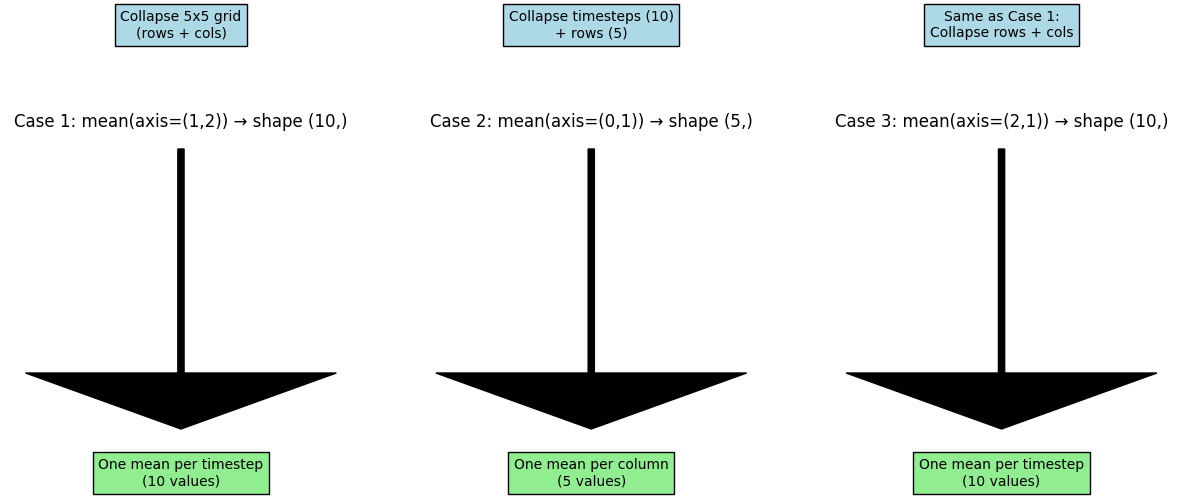

In [3]:
import matplotlib.pyplot as plt

# Let's draw diagrams to show axis meanings
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Common labels for dataset: shape (10, 5, 5)
# Axis 0 = timesteps, Axis 1 = rows, Axis 2 = columns

# Case 1: mean over (1,2) -> left axis 0 remains
axes[0].set_title("Case 1: mean(axis=(1,2)) → shape (10,)")
axes[0].text(0.5, 0.8, "Collapse 5x5 grid\n(rows + cols)", ha='center', fontsize=10, bbox=dict(facecolor='lightblue'))
axes[0].arrow(0.5, 0.7, 0, -0.2, head_width=0.05, head_length=0.05, fc='k', ec='k')
axes[0].text(0.5, 0.4, "One mean per timestep\n(10 values)", ha='center', fontsize=10, bbox=dict(facecolor='lightgreen'))

# Case 2: mean over (0,1) -> left axis 2 remains
axes[1].set_title("Case 2: mean(axis=(0,1)) → shape (5,)")
axes[1].text(0.5, 0.8, "Collapse timesteps (10)\n+ rows (5)", ha='center', fontsize=10, bbox=dict(facecolor='lightblue'))
axes[1].arrow(0.5, 0.7, 0, -0.2, head_width=0.05, head_length=0.05, fc='k', ec='k')
axes[1].text(0.5, 0.4, "One mean per column\n(5 values)", ha='center', fontsize=10, bbox=dict(facecolor='lightgreen'))

# Case 3: mean over (2,1) -> same as Case 1
axes[2].set_title("Case 3: mean(axis=(2,1)) → shape (10,)")
axes[2].text(0.5, 0.8, "Same as Case 1:\nCollapse rows + cols", ha='center', fontsize=10, bbox=dict(facecolor='lightblue'))
axes[2].arrow(0.5, 0.7, 0, -0.2, head_width=0.05, head_length=0.05, fc='k', ec='k')
axes[2].text(0.5, 0.4, "One mean per timestep\n(10 values)", ha='center', fontsize=10, bbox=dict(facecolor='lightgreen'))

for ax in axes:
    ax.axis('off')

plt.show()

In [4]:
#  Converting a 1D vector into a column or row

import numpy as np

a = np.array([1, 2, 3])   # shape (3,)
print("Original:", a, "Shape:", a.shape)

# Turn into a column vector
col = a[:, np.newaxis]    # insert new axis at position 1
print("Column vector:\n", col, "Shape:", col.shape)

# Turn into a row vector
row = a[np.newaxis, :]    # insert new axis at position 0
print("Row vector:\n", row, "Shape:", row.shape)


Original: [1 2 3] Shape: (3,)
Column vector:
 [[1]
 [2]
 [3]] Shape: (3, 1)
Row vector:
 [[1 2 3]] Shape: (1, 3)


In [5]:
#  Expanding for broadcasting

x = np.array([10, 20, 30])         # shape (3,)
y = np.array([1, 2])               # shape (2,)

# If we want to add them in a 2D way:
result = x[np.newaxis, :] + y[:, np.newaxis]
print(result)
print("Shape:", result.shape)


[[11 21 31]
 [12 22 32]]
Shape: (2, 3)
